<a href="https://colab.research.google.com/github/PadmajaVB/Sexist-Statement-Detection/blob/main/Build_sexist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Combining data from multiple sources

## 1. Reading data from multiple sources to a DataFrame

In [ ]:
benevolent_data_path = '/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/Benevolent_sexism.csv'
sexist_comment_data_path = '/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/everyday_sexist_comment.csv'
reddit_data_path = '/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/reddit (1).csv'
isep_data_path = '/content/drive/MyDrive/UnivAI/AI-3 Project/data/ISEP Sexist Data labeling.xlsx'

In [ ]:
original_data = pd.read_excel(isep_data_path)
benevolent_df = pd.read_csv(benevolent_data_path)
sexist_comment_df = pd.read_csv(sexist_comment_data_path)
reddit_df = pd.read_csv(reddit_data_path)

In [ ]:
X = original_data[['Sentences']]
y = original_data['Label']

## 2. Split the data into train, validation and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=66, shuffle=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7, stratify=y_train, random_state=66, shuffle=True)

In [ ]:
train_data = X_train.copy()
train_data['Label'] = y_train

In [ ]:
test_data = X_test.copy()
test_data['Label'] = y_test

In [ ]:
val_data = X_val.copy()
val_data['Label'] = y_val

In [ ]:
val_data = val_data[val_data['Sentences'].apply(lambda x: len(x.split()) < 1000)]
test_data = test_data[test_data['Sentences'].apply(lambda x: len(x.split()) < 1000)]

In [ ]:
new_benevolent_df = benevolent_df[["1"]]
new_benevolent_df['Label'] = 1

In [ ]:
new_benevolent_df.rename(columns={'1': 'Sentences'}, inplace=True)

In [ ]:
sexist_comment_df = pd.read_csv(sexist_comment_data_path)

In [ ]:
new_sexist_comment_df = sexist_comment_df[['Sentences','Label']]

In [ ]:
reddit_df = pd.read_csv(reddit_data_path)

In [ ]:
new_reddit_df = reddit_df[['body','Sexism']]
new_reddit_df.rename(columns={'body':'Sentences','Sexism':'Label'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 3. Combining all the datasets and filter rows with sentence length less than 1000

In [ ]:
sexist_data = pd.concat([new_benevolent_df, new_sexist_comment_df, new_reddit_df, train_data], axis=0)

In [ ]:
sexist_data = sexist_data[sexist_data['Sentences'].apply(lambda x: len(x.split()) < 1000)]

## 4. Clean the dataset

In [ ]:
def clean_data(df):
  df.Sentences = [element.lower() for element in df.Sentences]
  df.Sentences = [re.sub(r'[^a-zA-Z /n]', '', element) for element in df.Sentences]
  # df.Sentences = ['<s> '+ element + ' </s>' for element in df.Sentences]
  return df

In [ ]:
df = clean_data(sexist_data)
test_data = clean_data(test_data)
val_data = clean_data(val_data)

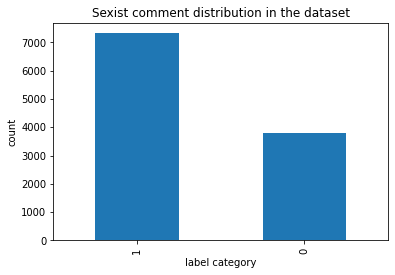

In [ ]:
df['Label'].value_counts().plot(kind='bar')
plt.xlabel('label category')
plt.ylabel('count')
plt.title('Sexist comment distribution in the dataset')
plt.show()

In [ ]:
df.head()

,Sentences,Label
0,happy womensday to all my sassy women classy w...,1
1,the lights are out at the statue of libertytha...,1
2,we cant achieve any of our goals without the p...,1
3,she parties like a man but loves like a woman,1
4,lucky is the man who is the first love of a wo...,1


## 5. Save the train, validation and test sets into different files

In [ ]:
df.to_csv('/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/train_dataset.csv')

In [ ]:
test_data.to_csv('/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/test_dataset.csv')
val_data.to_csv('/content/drive/MyDrive/UnivAI/AI-3 Project/data/Preprocessed data/val_dataset.csv')